In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.transforms import transforms
from torchvision import models
from torch.utils.data import Dataset,DataLoader
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torchview import draw_graph


In [ ]:

pip install torchview

In [ ]:
upl = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [ ]:
d = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
d

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
import torch

In [ ]:
X = d.drop(columns='label').to_numpy()

In [ ]:
y = d['label'].to_numpy()

In [ ]:
X = X/255.0

In [ ]:
Xt,yt = torch.tensor(X,dtype=torch.float),torch.tensor(y,dtype=torch.long)

In [ ]:
Xt.shape

torch.Size([10000, 784])

In [ ]:
X_train,X_test = Xt[:4800],Xt[4800:6000]

In [ ]:
Y_train,Y_test = yt[:4800],yt[4800:6000]

In [ ]:
X_train.shape

torch.Size([4800, 784])

In [ ]:
Y_test.shape

torch.Size([1200])

In [ ]:
class Customdata(Dataset):
  def __init__(self,X,y):
    self.features = X
    self.labels = y
  def __len__(self):
    return len(self.features)
  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [ ]:
train_dataset = Customdata(X_train,Y_train)
test_dataset = Customdata(X_test,Y_test)

In [ ]:
train_load = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_load = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
class NetsMan(nn.Module):
  def __init__(self,input_s,output_s,hidden_layers,num_neurons):
    super().__init__()
    layers = [ nn.Linear(in_features=input_s,out_features=num_neurons),
              nn.ReLU()]
    for i in range(hidden_layers):
      layers.append(
          nn.Linear(in_features=num_neurons,out_features=num_neurons)
      )
      layers.append(nn.ReLU())
    layers.append(
        nn.Linear(in_features=num_neurons,out_features=output_s)
    )


    self.network = nn.Sequential(*layers)
  def forward(self,x):
    return self.network(x)


In [ ]:
Fn = NetsMan(784,10,2,64)

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(Fn.parameters(),lr=0.1,weight_decay=1e-4)

In [ ]:
for i in range(300):
  total_loss = 0
  for batch,batch_label in train_load:
    out = Fn(batch)

    loss = loss_func(out,batch_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  print(f'average loss in {i}th itertaion {total_loss/len(train_load)}')




average loss in 0th itertaion 1.67655552983284
average loss in 1th itertaion 0.9294880819320679
average loss in 2th itertaion 0.73940884967645
average loss in 3th itertaion 0.629139188726743
average loss in 4th itertaion 0.5837561628222465
average loss in 5th itertaion 0.5454324527581533
average loss in 6th itertaion 0.4905869809786479
average loss in 7th itertaion 0.48406434764464695
average loss in 8th itertaion 0.45143568883339563
average loss in 9th itertaion 0.4361442796389262
average loss in 10th itertaion 0.4132527248064677
average loss in 11th itertaion 0.3989364778995514
average loss in 12th itertaion 0.3827416069805622
average loss in 13th itertaion 0.36935227587819097
average loss in 14th itertaion 0.36083884194493293
average loss in 15th itertaion 0.3325559955835342
average loss in 16th itertaion 0.34596978401144346
average loss in 17th itertaion 0.3218801117440065
average loss in 18th itertaion 0.30648920113841693
average loss in 19th itertaion 0.3039855390290419
average l

In [ ]:
Fn.eval()

NetsMan(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
corr =0
with torch.no_grad():
  for batch,labels in test_load:
    out = Fn(batch)
    _,pred = torch.max(out,1)
    total += labels.shape[0]
    corr = corr + (labels == pred).sum().item()

In [ ]:
corr/total

0.8433333333333334

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda')

In [ ]:
X = d.drop(columns='label').to_numpy()

In [ ]:
y = d['label'].to_numpy()

In [ ]:
X = X/255.0

In [ ]:
Xn,yn = torch.tensor(X,dtype=torch.float),torch.tensor(y,dtype=torch.long)

In [ ]:
X_train,X_test = Xn[:8000],Xn[8000:]

In [ ]:
Y_train,Y_test = yn[:8000],yn[8000:]

In [ ]:
train_dataset = Customdata(X_train,Y_train)
test_dataset = Customdata(X_test,Y_test)

In [ ]:
train_load = DataLoader(train_dataset,batch_size=100,shuffle=True,pin_memory=True)
test_load = DataLoader(test_dataset,batch_size=100,shuffle=False,pin_memory=True)

In [ ]:
epoch = 100
Lr  = 0.1

In [ ]:
X.shape

(10000, 784)

In [ ]:
mynet = NetsMan(X.shape[1],10,3,64)

In [ ]:
mynet = mynet.to(device)

In [ ]:
loss2 = nn.CrossEntropyLoss()

In [ ]:
opt = torch.optim.SGD(mynet.parameters(),lr=Lr,weight_decay=1e-4)

In [ ]:
for i in range(epoch):
  total_loss = 0
  for batch,batch_label in train_load:
    batch,batch_label = batch.to(device), batch_label.to(device)
    out = mynet(batch)

    loss = loss2(out,batch_label)
    opt.zero_grad()
    loss.backward()
    opt.step()
    total_loss += loss.item()

  print(f'average loss in {i}th itertaion {total_loss/len(train_load)}')



average loss in 0th itertaion 2.2877397179603576
average loss in 1th itertaion 1.8484997525811195
average loss in 2th itertaion 1.185305979847908
average loss in 3th itertaion 0.9965927422046661
average loss in 4th itertaion 0.7967727772891522
average loss in 5th itertaion 0.7403516434133053
average loss in 6th itertaion 0.6902879312634468
average loss in 7th itertaion 0.638441252335906
average loss in 8th itertaion 0.6075480442494154
average loss in 9th itertaion 0.5787532094866037
average loss in 10th itertaion 0.5526738073676825
average loss in 11th itertaion 0.5816424958407879
average loss in 12th itertaion 0.5276512887328864
average loss in 13th itertaion 0.5090714015066624
average loss in 14th itertaion 0.4969249252229929
average loss in 15th itertaion 0.48126371912658217
average loss in 16th itertaion 0.5207609064877033
average loss in 17th itertaion 0.46517053097486494
average loss in 18th itertaion 0.4588720466941595
average loss in 19th itertaion 0.4392743639647961
average lo

In [ ]:
mynet.eval()

NetsMan(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total=0
corr = 0
with torch.no_grad():
  for batch,batch_label in test_load:
    batch,batch_label = batch.to(device),batch_label.to(device)
    out = mynet(batch)
    _,pred = torch.max(out,1)
    total += batch.shape[0]
    corr = corr + (pred == batch_label).sum().item()
print(corr/total)

0.852


Optimizations

In [ ]:
class NetsMan2(nn.Module):
  def __init__(self,input_s,output_s,hidden_layers,num_neurons):
    super().__init__()
    layers = [ nn.Linear(in_features=input_s,out_features=num_neurons),
              nn.BatchNorm1d(num_neurons),
              nn.ReLU(),
               nn.Dropout(p=0.3)]
    for i in range(hidden_layers):
      layers.append(
          nn.Linear(in_features=num_neurons,out_features=num_neurons)
      )
      layers.append(nn.BatchNorm1d(num_neurons))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(p=0.3))
    layers.append(
        nn.Linear(in_features=num_neurons,out_features=output_s)
    )


    self.network = nn.Sequential(*layers)
  def forward(self,x):
    return self.network(x)


In [ ]:
model = NetsMan2(X.shape[1],10,3,64)

In [ ]:
model = model.to(device)

In [ ]:
loss_function = nn.CrossEntropyLoss()

In [ ]:
opt = torch.optim.SGD(model.parameters(),lr=0.1,weight_decay=1e-4)

In [ ]:
for i in range(epoch):
  total =0
  for batch,batch_label in train_load:
    batch,batch_label = batch.to(device),batch_label.to(device)
    out = model(batch)
    loss = loss_function(out,batch_label)
    opt.zero_grad()
    loss.backward()
    opt.step()
    total += loss.item()
  print(f'average batch error in {i}th iter is {total/len(train_load)}')

average batch error in 0th iter is 1.4467497490346433
average batch error in 1th iter is 0.8958900436758995
average batch error in 2th iter is 0.7736209318041801
average batch error in 3th iter is 0.7063088018447161
average batch error in 4th iter is 0.6688782814890146
average batch error in 5th iter is 0.6284949939697981
average batch error in 6th iter is 0.6042103879153728
average batch error in 7th iter is 0.59190215729177
average batch error in 8th iter is 0.5691602490842342
average batch error in 9th iter is 0.5652155160903931
average batch error in 10th iter is 0.5434278581291437
average batch error in 11th iter is 0.5321978472173214
average batch error in 12th iter is 0.5231235776096582
average batch error in 13th iter is 0.5159492712467909
average batch error in 14th iter is 0.5071132991462945
average batch error in 15th iter is 0.4864389464259148
average batch error in 16th iter is 0.47680201977491377
average batch error in 17th iter is 0.4773361194878817
average batch error i

In [ ]:
model.eval()

NetsMan2(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=64, bias=True)
    (13): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total=0
corr =0
with torch.no_grad():
  for batch,batch_label in test_load:
    batch,batch_label = batch.to(device),batch_label.to(device)
    out = model(batch)
    _,preds = torch.max(out,1)
    total += batch.shape[0]
    corr += (preds == batch_label).sum().item()
print(corr/total)

0.8665


In [ ]:
total=0
corr =0
with torch.no_grad():
  for batch,batch_label in train_load:
    batch,batch_label = batch.to(device),batch_label.to(device)
    out = model(batch)
    _,preds = torch.max(out,1)
    total += batch.shape[0]
    corr += (preds == batch_label).sum().item()
print(corr/total)

0.951625


HyperParameter Tunning with optuna

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 29.7 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trail):
  hidd_layers = trail.suggest_int('number_hidden_layers',1,5)
  n_neurons = trail.suggest_int('number_of_neurons',8,128,step=8)

  model = NetsMan2(784,10,hidd_layers,n_neurons)
  model = model.to(device)

  epoch = 50
  loss_func = nn.CrossEntropyLoss()
  opt = torch.optim.SGD(model.parameters(),lr=0.1,weight_decay=1e-4)
  for _ in range(epoch):
    for batch,batch_label in train_load:
      batch = batch.to(device)
      batch_label = batch_label.to(device)
      out = model(batch)
      loss = loss_func(out,batch_label)
      opt.zero_grad()
      loss.backward()
      opt.step()
  total= 0
  corr =0
  for batch,batch_label in test_load:
    batch = batch.to(device)
    batch_label = batch_label.to(device)
    out = model(batch)
    _,pred = torch.max(out,1)
    total += batch.shape[0]
    corr += (pred == batch_label).sum().item()

  return corr/total

In [ ]:
study = optuna.create_study(direction='maximize')

[I 2025-11-25 04:49:51,874] A new study created in memory with name: no-name-0dfb5225-21ef-4b8f-b189-fce516039c12


In [ ]:
study.optimize(objective,n_trials=10)

[I 2025-11-25 04:50:11,321] Trial 0 finished with value: 0.7805 and parameters: {'number_hidden_layers': 3, 'number_of_neurons': 32}. Best is trial 0 with value: 0.7805.
[I 2025-11-25 04:50:26,040] Trial 1 finished with value: 0.758 and parameters: {'number_hidden_layers': 2, 'number_of_neurons': 24}. Best is trial 0 with value: 0.7805.
[I 2025-11-25 04:50:42,654] Trial 2 finished with value: 0.843 and parameters: {'number_hidden_layers': 3, 'number_of_neurons': 96}. Best is trial 2 with value: 0.843.
[I 2025-11-25 04:50:57,918] Trial 3 finished with value: 0.8185 and parameters: {'number_hidden_layers': 2, 'number_of_neurons': 48}. Best is trial 2 with value: 0.843.
[I 2025-11-25 04:51:14,326] Trial 4 finished with value: 0.837 and parameters: {'number_hidden_layers': 3, 'number_of_neurons': 96}. Best is trial 2 with value: 0.843.
[I 2025-11-25 04:51:29,228] Trial 5 finished with value: 0.8215 and parameters: {'number_hidden_layers': 2, 'number_of_neurons': 48}. Best is trial 2 with v

In [ ]:
study.best_trial.value

0.843

In [ ]:
study.best_params.values()

dict_values([3, 96])

In [ ]:
d

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
d.shape

(10000, 785)

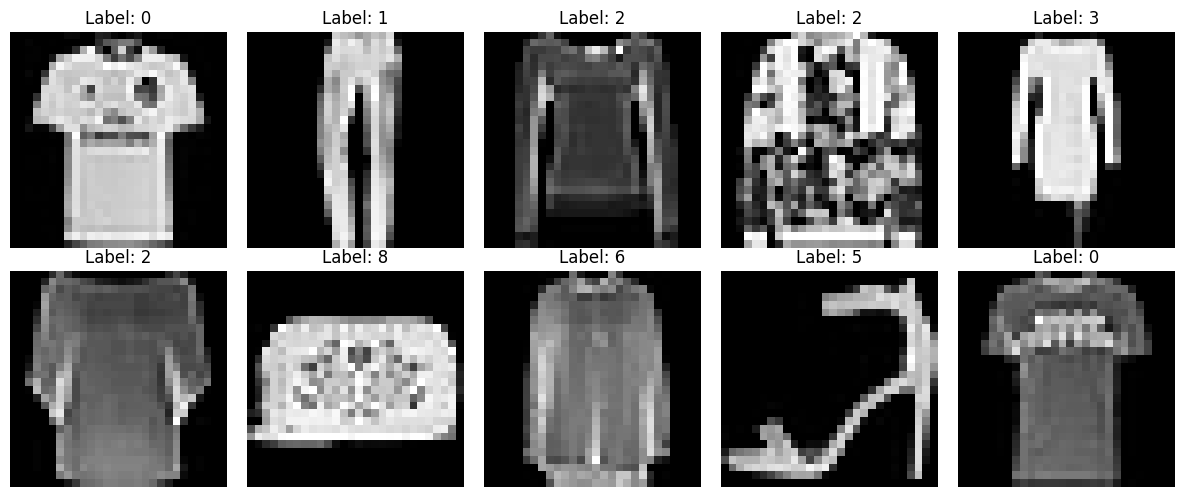

In [ ]:
features = d.drop(columns='label')
label = d['label']
fig,axes = plt.subplots(2,5,figsize=(12,5))
for i in range(10):
  im = features.iloc[i].values.reshape(28,28)
  ax = axes[i // 5, i% 5]
  ax.imshow(im,cmap='grey')
  ax.set_title(f"Label: {label.iloc[i]}")
  ax.axis('off')
plt.tight_layout()
plt.show()


Lets build CNN

In [ ]:
class Customdata(Dataset):
  def __init__(self,feature,target):
    self.features = feature.reshape(-1,1,28,28)
    self.target = target

  def __len__(self):
    return len(self.features)
  def __getitem__(self, index):


    return self.features[index] , self.target[index]



In [ ]:
X = torch.tensor(d.drop(columns='label').to_numpy() , dtype=torch.float)
y = torch.tensor(d['label'].to_numpy(),dtype=torch.long)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ..., 115.,  35.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.]])

In [ ]:
train_data = Customdata(X_train,Y_train)
test_data = Customdata(X_test,Y_test)

In [ ]:
train = DataLoader(train_data,batch_size=32,shuffle=True,pin_memory=True)
test = DataLoader(test_data,batch_size=32,shuffle=False,pin_memory=True)

In [ ]:
from torch.nn.modules.batchnorm import BatchNorm2d
class Mycnn(nn.Module):
  def __init__(self):
    super().__init__()
    self.filter = nn.Sequential(
        nn.Conv2d(1,32,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Conv2d(32,64,3,1,1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2,stride=2),

    )



    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(3136,1000,bias=True),
        nn.ReLU(),
        nn.BatchNorm1d(1000),
        nn.Dropout(p=0.4),
        nn.Linear(1000,10,bias=True),

    )
  def forward(self,x):
    f = self.filter(x)

    y = self.layers(f)
    return y




In [ ]:
cnn = Mycnn()

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda')

In [ ]:
cnn = cnn.to(device)

In [ ]:
epoch = 100
learning_rate = 3e-4

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
optm = torch.optim.Adam(cnn.parameters(),lr=learning_rate,weight_decay=1e-3)

In [ ]:
for i in range(epoch):
  av_loss = 0
  cnn.train()
  for batch,batch_label  in train:
    batch =batch.to(device)
    batch_label = batch_label.to(device)

    out = cnn(batch)
    _,pred = torch.max(out,1)
    loss = loss_func(out,batch_label)
    optm.zero_grad()
    loss.backward()
    optm.step()
    av_loss += loss.item()


  print(f'average loss per batch in {i}th epoch is {av_loss/len(train)}')


average loss per batch in 0th epoch is 0.5179659872055054
average loss per batch in 1th epoch is 0.31704594984650614
average loss per batch in 2th epoch is 0.25174033361673354
average loss per batch in 3th epoch is 0.1922003103941679
average loss per batch in 4th epoch is 0.16060150791704655
average loss per batch in 5th epoch is 0.12027767715603113
average loss per batch in 6th epoch is 0.10146064815297723
average loss per batch in 7th epoch is 0.0960576012544334
average loss per batch in 8th epoch is 0.06739218041673303
average loss per batch in 9th epoch is 0.05550392203405499
average loss per batch in 10th epoch is 0.054107538320124146
average loss per batch in 11th epoch is 0.056852779239416125
average loss per batch in 12th epoch is 0.051130845434963705
average loss per batch in 13th epoch is 0.038280436878092586
average loss per batch in 14th epoch is 0.044110730197280644
average loss per batch in 15th epoch is 0.03937023016996682
average loss per batch in 16th epoch is 0.033373

In [ ]:
cnn.eval()

Mycnn(
  (filter): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1000, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.4, inplace=False)
    (5): Linear(in_features=1000, out_features=10, bias=True)
  )
)

In [ ]:

total =0
corr =0
with torch.no_grad():
  for batch,batch_label in test:
    batch = batch.to(device)
    batch_label = batch_label.to(device)
    out = cnn(batch)
    _,pred = torch.max(out,1)

    corr += (pred == batch_label).sum().item()
    total += batch.shape[0]
print(f'Accuracy on test data is {corr/total}')

Accuracy on test data is 0.889


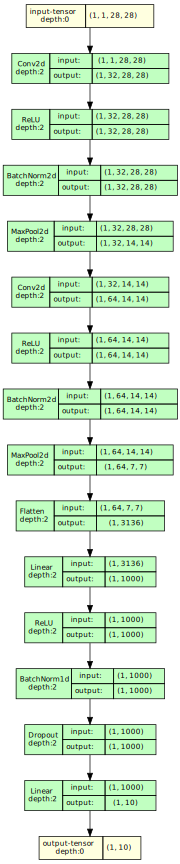

In [ ]:
graph = draw_graph(cnn, input_size=(1, 1, 28, 28))
graph.visual_graph

Lets Try with Pretrained Models

In [ ]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

In [ ]:
in_f = model.fc.in_features
model.fc = nn.Linear(in_f,10)

In [ ]:
model = model.to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [ ]:
transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomRotation(degrees=45),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485 , 0.456, 0.406] , std=[0.229,0.224,0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485 , 0.456, 0.406] , std=[0.229,0.224,0.225])
])


In [ ]:
class CusData2(Dataset):
  def __init__(self,X,y,transforms):
    self.features = X
    self.labels = y
    self.transform = transforms

  def __len__(self):
    return len(self.features)
    pass
  def __getitem__(self, index):
    img = self.features[index].reshape(28,28)
    img = img.astype(np.uint8)
    img = np.stack([img]*3,axis=-1)
    img = Image.fromarray(img)
    img = self.transform(img)


    return img , torch.tensor(self.labels[index],dtype=torch.long)

In [ ]:
X = d.drop(columns='label').to_numpy()
y = d['label'].to_numpy()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
train_data = CusData2(X_train,Y_train,transformer)
test_data = CusData2(X_test,Y_test,test_transform)

In [ ]:
train = DataLoader(train_data,batch_size=64,shuffle=True,pin_memory=True)
test = DataLoader(test_data,batch_size=64,shuffle=False,pin_memory=True)

In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for i in range(30):
  av_los = 0
  model.train()
  for batch,batch_label in train:
    batch = batch.to(device)
    batch_label = batch_label.to(device)
    optimizer.zero_grad()
    out = model(batch)
    loss = criterion(out,batch_label)
    loss.backward()
    optimizer.step()
    av_los += loss.item()
  print(f'Average on per batch in {i}th iteration is {av_los/len(train)}')

Average on per batch in 0th iteration is 0.8170789248943329
Average on per batch in 1th iteration is 0.7691787838935852
Average on per batch in 2th iteration is 0.723746054649353
Average on per batch in 3th iteration is 0.7042241015434265
Average on per batch in 4th iteration is 0.6893605101108551
Average on per batch in 5th iteration is 0.6908097214698792
Average on per batch in 6th iteration is 0.68559557056427
Average on per batch in 7th iteration is 0.669533177614212
Average on per batch in 8th iteration is 0.6555738167762757
Average on per batch in 9th iteration is 0.6481566565036774
Average on per batch in 10th iteration is 0.6539863455295563
Average on per batch in 11th iteration is 0.6381162848472596
Average on per batch in 12th iteration is 0.6348877539634704
Average on per batch in 13th iteration is 0.6347021975517273
Average on per batch in 14th iteration is 0.6166372270584106
Average on per batch in 15th iteration is 0.6307974314689636
Average on per batch in 16th iteration

In [ ]:
model.eval()

NameError: name 'model' is not defined

In [ ]:
total =0
corr =0
with torch.no_grad():
  for batch,batch_label in test:
    batch = batch.to(device)
    batch_label = batch_label.to(device)
    out = model(batch)
    _,pred = torch.max(out,1)

    corr += (pred == batch_label).sum().item()
    total += batch.shape[0]
print(f'Accuracy on test data is {corr/total}')

Accuracy on test data is 0.746


In [ ]:
torch.save({
    "model": cnn.state_dict(),
    "optimizer": optimizer.state_dict(),
    "epoch": epoch
}, "checkpoint.pth")